In [1]:
import numpy as np

In [2]:
small_obs = np.load('./init_data/small_prev_obs.npy')

In [3]:
import matplotlib.pyplot as plt

In [4]:
small_obs.shape

(10000, 64, 96, 3)

### RUNS:

0-1963

1964-3829

3830-5728

5729-7621

7622-9500

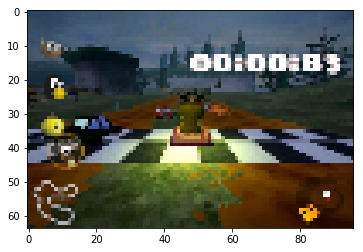

In [92]:
plt.imshow(small_obs[1964])
plt.show()

In [30]:
ranges = [(0,1964),(1964,3830),(3830,5729),(5729,7622),(7622,9501)]

In [31]:
# key: tuple range, val:list of time data
training_data = {}

In [23]:
states = np.load('./init_data/prev_state_memory.npy')[:,:5]
actions = np.load('./init_data/prev_a_r.npy')[:,0]
VALID_ACTIONS = [4,5,6,36,37,38]

In [25]:
#action_filters = [actions==action for action in VALID_ACTIONS]
for i in range(actions.shape[0]):
    actions[i]=VALID_ACTIONS.index(actions[i])

In [26]:
actions

array([ 1.,  0.,  0., ...,  0.,  0.,  0.])

In [27]:
# use training to normalize
state_mean = np.mean(states[0:7622],axis = 0)
state_sigma = np.std(states[0:7622],axis = 0)
states = (states-state_mean)/state_sigma

In [24]:
states.shape

(10000, 5)

In [28]:
def prepare_data(inputs, n):
    new = []
    for i in range(inputs.shape[0]-n):
        new.append(inputs[i:i+n])
    return np.asarray(new)

In [15]:
obs1 = np.copy(small_obs[ranges[0][0]:ranges[0][1]])

In [17]:
obs1.shape[0]

1964

In [21]:
obs1[1964-10:1966].shape

(10, 64, 96, 3)

In [28]:
obs1[1954:1964].shape

(10, 64, 96, 3)

In [32]:
seq_length = 6 # about 1 second
for i in range(len(ranges)):
    
    bound = ranges[i]
    
    frames = small_obs[bound[0]:bound[1]]
    state = states[bound[0]:bound[1]]
    action = actions[bound[0]:bound[1]]
    total = [prepare_data(frames,seq_length),prepare_data(state,seq_length),prepare_data(action,seq_length)]
    training_data[bound] = total

In [27]:
training_data[(0,1964)][0].shape

(1958, 6, 64, 96, 3)

In [28]:
training_data[(0,1964)][1].shape

(1958, 6, 5)

In [29]:
training_data[(0,1964)][2].shape

(1958, 6)

In [33]:
training_images = []
training_states = []
training_actions = []
for i in range(len(ranges)-1):
    curr = ranges[i]
    info = training_data[curr]
    training_images.append(info[0])
    training_states.append(info[1])
    training_actions.append(info[2])
ti = np.asarray(training_images)
ts = np.asarray(training_states)
ta = np.asarray(training_actions)

In [34]:
np.save('./lstm_data/train_images.npy',ti)

In [35]:
np.save('./lstm_data/train_states.npy',ts)

In [36]:
np.save('./lstm_data/train_actions.npy',ta)

In [37]:
training_images = []
training_states = []
training_actions = []
curr = ranges[len(ranges)-1]
info = training_data[curr]
training_images.append(info[0])
training_states.append(info[1])
training_actions.append(info[2])
ti = np.asarray(training_images)
ts = np.asarray(training_states)
ta = np.asarray(training_actions)

In [39]:
np.save('./lstm_data/test_images.npy',ti)
np.save('./lstm_data/test_states.npy',ts)
np.save('./lstm_data/test_actions.npy',ta)

In [35]:
np.save('./lstm_data/state_mean.npy',state_mean)

In [36]:
np.save('./lstm_data/state_std.npy',state_sigma)